# **Time series weather product pridiction in XGBoost**
#### *Learning Objective: Tree algorithm application for Gradiant Boosting regression regression*

## Step 1: Import neccsary pakages

In [10]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBRegressor
import matplotlib as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import numpy as np
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import cohen_kappa_score
from sklearn.preprocessing import MinMaxScaler
from tensorflow import keras
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, Input, BatchNormalization
from sklearn import metrics, svm

## Step 2: Read data from csv files

In [11]:
import pandas as pd
#Step 1: Read and explore data
file='C:/Users/Addisu/Desktop/kidi files/kidi/Evap/Data/Observed/Metehara/DEVAPll.csv'
raw_data = pd.read_csv(file, parse_dates = ['Date'],
                       index_col = 'Date')
dfml = raw_data.copy()
dfml

,PCP,Tmin,Tmax,Month,year,Tmean,Rhmax,Rhmin,Rhmean,Evapoavg,WS,SH
Date,,,,,,,,,,,,
1993-01-01,0.0,20.8,31.6,1,1993,26.20,75.0,40.0,57.5,3.471109,1.8,8.4
1993-01-02,0.0,17.8,32.0,1,1993,24.90,81.0,44.0,62.5,3.421044,1.6,8.3
1993-01-03,0.0,14.0,33.0,1,1993,23.50,89.0,41.0,65.0,4.001721,1.2,10.5
1993-01-04,0.0,12.6,32.0,1,1993,22.30,91.0,46.0,68.5,3.618233,2.1,9.2
1993-01-05,0.0,16.2,33.8,1,1993,25.00,82.0,43.0,62.5,3.844625,1.4,9.8
...,...,...,...,...,...,...,...,...,...,...,...,...
2016-12-27,0.0,10.5,31.0,12,2016,20.75,83.0,26.0,54.5,1.150054,0.8,0.1
2016-12-28,0.0,8.4,32.0,12,2016,20.20,86.0,27.0,56.5,3.723602,0.9,10.3
2016-12-29,0.0,9.0,32.0,12,2016,20.50,80.0,28.0,54.0,1.185701,1.0,0.2


## Step 3: Pre prosseing of the data

In [12]:
# Read data from  csv files
X = dfml.drop(["Evapoavg"], axis=1)
y = dfml["Evapoavg"]


Input_data_features = X.values
Input_data_labels =y.values


# standardize input features X and output labels Y
#scaler_standardized_X = StandardScaler()
#Input_data_features = scaler_standardized_X.fit_transform(Input_data_features)

#scaler_standardized_Y = StandardScaler()
#Input_data_labels = scaler_standardized_Y.fit_transform(Input_data_labels)


# Split dataset into train, validation, an test
index_X_Train_End = int(0.7 * len(Input_data_features))
index_X_Validation_End = int(0.9 * len(Input_data_features))

X_train = Input_data_features[0: index_X_Train_End]
X_valid = Input_data_features[index_X_Train_End: index_X_Validation_End]
X_test = Input_data_features[index_X_Validation_End:]
Y_valid = Input_data_labels[index_X_Train_End: index_X_Validation_End]
Y_test = Input_data_labels[index_X_Validation_End:]
Y_train = Input_data_labels[0: index_X_Train_End]

## Step 4:XGBoost Model and Hyperparamter tuning
### base model estimation

In [15]:
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    mape = 100 * np.mean(errors / test_labels)
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    
    return accuracy
base_model = XGBRegressor(random_state=30)
base_model.fit(X_train, Y_train)
base_accuracy = evaluate(base_model,X_test, Y_test)
xgb_base = base_model.predict(X_test)

Model Performance
Average Error: 0.0279 degrees.
Accuracy = 99.19%.


In [16]:
#Evaluation metrics before normalization 
MAE = metrics.mean_absolute_error(Y_test,xgb_base)
MSE = metrics.mean_squared_error(Y_test,xgb_base)
RMSE = np.sqrt(MSE) # or mse**(0.5) 
MAPE = mean_absolute_error(Y_test,xgb_base)*100

print("MAE:",format(MAE, '.3f'))
print("MSE:",format(MSE,'.3f'))
print("RMSE:", format(RMSE,'.3f'))
print("MAPE:",format(MAPE,'.3f') )


# Other Performance metrics

def relative_root_mean_squared_error(actual, predictions,model_name):
    num = np.sum(np.square(actual - predictions))
    den = np.sum(np.square(predictions))
    squared_error = num/den
    rrmse = np.sqrt(squared_error)
    print(model_name + ':')
    print('Relative root mean square error-LSTM: {:.4f}'.format(rrmse))
    return rrmse
def nse(actual, predictions,model_name):
    nse=(1-(np.sum((actual-predictions)**2)/np.sum((actual-np.mean(actual))**2)))
    print(model_name + ':')
    print('Nash-Sutcliff-Efficiency-LSTM: {:.4f}'.format(nse))
    return nse
from scipy import stats

def pbias(actual, predictions,model_name):
    pbias=100 *(sum((actual - predictions)/sum(actual)))
    #print(model_name + ':')
    #print('Percent-of-Bias-bilstm: {:.4f}'.format(pbias))
    return pbias

nse(Y_test, xgb_base,'LSTM')
#calc_kge(Y_test,gb_base,'LSTM')
relative_root_mean_squared_error(Y_test,xgb_base,'LSTM')
#evaluate_prediction(Y_test,rfr, 'LSTM')
PBIAS_BILSTM=pbias(Y_test, xgb_base,'LSTMLSTM')
PBIAS_BILSTM



MAE: 0.028
MSE: 0.002
RMSE: 0.041
MAPE: 2.794
LSTM:
Nash-Sutcliff-Efficiency-LSTM: 0.9978
LSTM:
Relative root mean square error-LSTM: 0.0099


0.06397370240519877

## Hyperparamter tuning using random search

In [22]:
parameters = {'objective':['reg:squarederror'],
              'booster':['gbtree','gblinear'],
              'learning_rate': [0.1], 
              'max_depth': [7,10,15,20],
              'min_child_weight': [10,15,20,25],
              'colsample_bytree': [0.8, 0.9, 1],
              'n_estimators': [300,400,500,600],
              "reg_alpha"   : [0.5,0.2,1],
              "reg_lambda"  : [2,3,5],
              "gamma"       : [1,2,3]}

xgb_model = XGBRegressor(random_state=30)

xg_random = RandomizedSearchCV(xgb_model,parameters, cv=5,n_iter=5,scoring='neg_mean_absolute_error',verbose=5,n_jobs=12)
xg_random.fit(X_train, Y_train,verbose = 1)

#y_pred_train = grid_obj_xgb.predict(df_train)
XGB_random = xg_random.predict(X_test)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


In [24]:
#Evaluation metrics before normalization 
MAE = metrics.mean_absolute_error(Y_test,XGB_random)
MSE = metrics.mean_squared_error(Y_test,XGB_random)
RMSE = np.sqrt(MSE) # or mse**(0.5) 
MAPE = mean_absolute_error(Y_test,XGB_random)*100

print("MAE:",format(MAE, '.3f'))
print("MSE:",format(MSE,'.3f'))
print("RMSE:", format(RMSE,'.3f'))
print("MAPE:",format(MAPE,'.3f') )


# Other Performance metrics

def relative_root_mean_squared_error(actual, predictions,model_name):
    num = np.sum(np.square(actual - predictions))
    den = np.sum(np.square(predictions))
    squared_error = num/den
    rrmse = np.sqrt(squared_error)
    print(model_name + ':')
    print('Relative root mean square error-LSTM: {:.4f}'.format(rrmse))
    return rrmse
def nse(actual, predictions,model_name):
    nse=(1-(np.sum((actual-predictions)**2)/np.sum((actual-np.mean(actual))**2)))
    print(model_name + ':')
    print('Nash-Sutcliff-Efficiency-LSTM: {:.4f}'.format(nse))
    return nse
from scipy import stats

def pbias(actual, predictions,model_name):
    pbias=100 *(sum((actual - predictions)/sum(actual)))
    #print(model_name + ':')
    #print('Percent-of-Bias-bilstm: {:.4f}'.format(pbias))
    return pbias

nse(Y_test,XGB_random,'LSTM')
#calc_kge(Y_test,gb_base,'LSTM')
relative_root_mean_squared_error(Y_test,XGB_random,'LSTM')
#evaluate_prediction(Y_test,rfr, 'LSTM')
PBIAS_BILSTM=pbias(Y_test, XGB_random,'LSTMLSTM')
PBIAS_BILSTM

MAE: 0.066
MSE: 0.009
RMSE: 0.093
MAPE: 6.635
LSTM:
Nash-Sutcliff-Efficiency-LSTM: 0.9889
LSTM:
Relative root mean square error-LSTM: 0.0223


-0.11201453617549438

## Step 7: visualzation

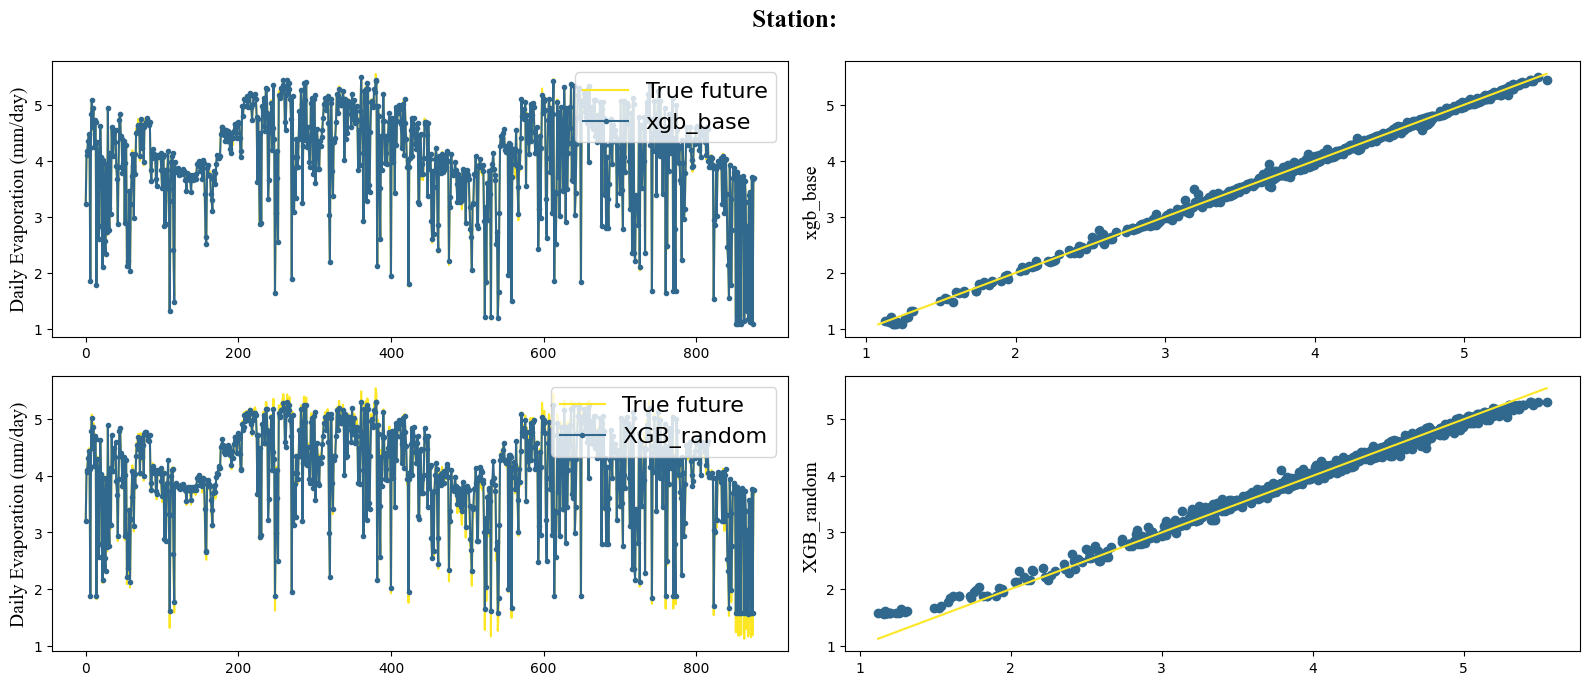

In [28]:
#%%
from matplotlib import pyplot as plt
from matplotlib import cm
import warnings
warnings.filterwarnings("ignore")
from matplotlib.axes._axes import _log as matplotlib_axes_logger
matplotlib_axes_logger.setLevel('ERROR')
from matplotlib.gridspec import GridSpec

from matplotlib import gridspec
viridis = cm.get_cmap('viridis', 4)
colors = [viridis(i) for i in range(0, 8)]




range_futurel = len(xgb_base)
range_future2 = len(XGB_random)

plt.figure(figsize=(16,16))
G = gridspec.GridSpec(5, 2)
plt.suptitle(' Station: ',fontname="Times New Roman", size=18,fontweight="bold", y=1)

axs_1 = plt.subplot(G[0,0])
#axs_1.set_xlabel('Time (day)', linespacing=3)
axs_1.set_ylabel('Daily Evaporation (mm/day)',fontname="Times New Roman",fontsize=14, linespacing=3)
axs_1.text(0.5, 0.5, '', ha='center', va='center', size=24, alpha=.5)
axs_1.plot(np.arange( range_futurel), np.array(Y_test), label='True Future',c=colors[4])     
axs_1.plot(np.arange( range_future2),np.array(xgb_base),label='RFR',c=colors[1],marker = '.')
axs_1.legend(['True future', 'xgb_base'], loc='upper right',fontsize=16)

axs_2 = plt.subplot(G[0, 1])
#axs_2.set_xlabel('True Future', linespacing=3)
axs_2.set_ylabel('xgb_base ',fontname="Times New Roman", linespacing=3,fontsize=14)
axs_2.scatter(Y_test, xgb_base, c=colors[1])
#plt.yscale('log')
#plt.xscale('log')
p1 = max(max(xgb_base), max(Y_test))
p2 = min(min(xgb_base), min(Y_test))
plt.plot([p1, p2], [p1, p2], 'b-',c=colors[4])
#plt.axis('equal')

axs_3 = plt.subplot(G[1,0])
#axs_1.set_xlabel('Time (day)', linespacing=3)
axs_3.set_ylabel('Daily Evaporation (mm/day)',fontname="Times New Roman",fontsize=14, linespacing=3)
axs_3.text(0.5, 0.5, '', ha='center', va='center', size=24, alpha=.5)
axs_3.plot(np.arange( range_futurel), np.array(Y_test), label='True Future',c=colors[4])     
axs_3.plot(np.arange( range_futurel),np.array(XGB_random),label='gb',c=colors[1],marker = '.')
axs_3.legend(['True future', 'XGB_random'], loc='upper right',fontsize=16)

axs_4 = plt.subplot(G[1, 1])
#axs_2.set_xlabel('True Future', linespacing=3)
axs_4.set_ylabel('XGB_random ',fontname="Times New Roman", linespacing=3,fontsize=14)
axs_4.scatter(Y_test,XGB_random, c=colors[1])
#plt.yscale('log')
#plt.xscale('log')
p1 = max(max(XGB_random), max(Y_test))
p2 = min(min(XGB_random), min(Y_test))
plt.plot([p1, p2], [p1, p2], 'b-',c=colors[4])
#plt.axis('equal')


results_path = 'me.png'
    #print(results_path)
plt.savefig(results_path,bbox_inches='tight', dpi=300,format="png")

plt.tight_layout()